In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [ ]:
mnist

In [ ]:
mnist.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#total samples are 70000,Total pixel=784
mnist.data.shape

(70000, 784)

In [ ]:
mnist.target

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
#target is of object data type(string) so we need to typecast
mnist.target = [int (i) for i in mnist.target]

In [ ]:
mnist.target[0:10]

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]

In [ ]:
np.reshape(mnist.data[1], (28,28))

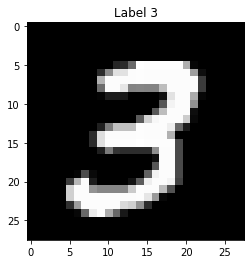

In [ ]:
#total no. of pixels =28*28 =784
plt.imshow(np.reshape(mnist.data[7], (28,28)),cmap='gray')
plt.title("Label %i" %mnist.target[7])
plt.show()



# **Cross Validation**
Split Data Into Train and Test

In [ ]:
X = mnist.data
Y = mnist.target

In [ ]:
X =X.astype('float32')/255    #to bring X into range

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 3)

In [ ]:
X_train.shape

(59500, 784)

In [ ]:
X_test.shape

(10500, 784)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
#Default :Binary Class Classification
#But our target is Multiclass
#C = Higher the better (decision boundary will be more strict)                                                #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html(link for setting)
#1e5 means 10 to the power 5 (10^5
# max_iter = num of iterations iterations to converge error
logit_model =LogisticRegression(solver='lbfgs', multi_class = 'multinomial', max_iter= 1e3, C = 1e2)

In [ ]:
logit_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000.0,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logit_model.score(X_test,Y_test)

0.9195238095238095

# **Prediction**

In [ ]:
yhat = logit_model.predict(X_test)

In [ ]:
yhat

array([3, 5, 3, ..., 7, 5, 9])

# **Classification Report**
Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

In [ ]:
prediction = logit_model.predict(X_test)

In [ ]:
confusion_matrix(Y_test,prediction)

array([[1017,    0,    5,    6,    2,   11,    9,    3,    0,    3],
       [   0, 1157,   11,    2,    0,    7,    2,    3,    8,    1],
       [   8,   11,  942,   13,    8,    2,   14,   10,   32,    2],
       [   6,    4,   22,  969,    4,   32,    3,   11,   15,   11],
       [   2,    6,    6,    2,  945,    3,    7,    8,   12,   24],
       [  10,    1,    8,   29,    5,  839,   17,    7,   30,   13],
       [  11,    4,   10,    1,   13,   22,  945,    4,    5,    0],
       [   2,    7,    9,    5,   16,    3,    0, 1012,    1,   31],
       [   8,   21,   15,   29,    5,   27,   11,    6,  914,   18],
       [   3,    5,    1,   15,   25,    3,    0,   31,    7,  915]])

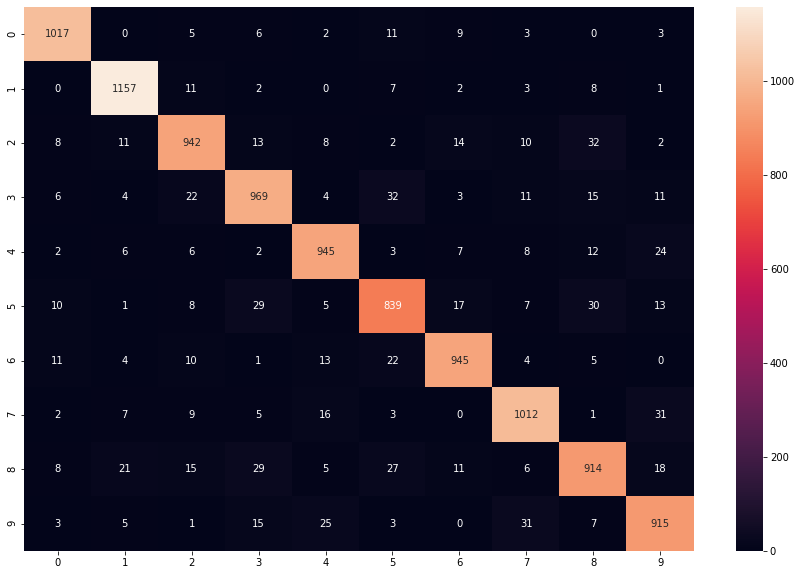

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(Y_test,prediction),annot=True,fmt='0.0f')               #->false negative    |false positive
                                                                                                          v

In [ ]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1056
           1       0.95      0.97      0.96      1191
           2       0.92      0.90      0.91      1042
           3       0.90      0.90      0.90      1077
           4       0.92      0.93      0.93      1015
           5       0.88      0.87      0.88       959
           6       0.94      0.93      0.93      1015
           7       0.92      0.93      0.93      1086
           8       0.89      0.87      0.88      1054
           9       0.90      0.91      0.90      1005

    accuracy                           0.92     10500
   macro avg       0.92      0.92      0.92     10500
weighted avg       0.92      0.92      0.92     10500



# **New Prediction**

In [ ]:
import cv2
img = cv2.imread('/content/digit 7.png',0)           #0 stands for gray scale img and not RGB

In [ ]:
img.shape

(648, 1152)

In [ ]:
img = cv2.resize(img , (28,28))

In [ ]:
#bitwise will print no. in white and background will be black
img = cv2.bitwise_not(img)

In [ ]:
img.shape

(28, 28)

In [ ]:
img_data = img.reshape(1,784)

In [ ]:
logit_model.predict(img_data)

array([8])

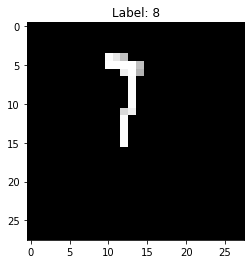

In [ ]:
yhat = logit_model.predict(img_data)
plt.imshow(np.reshape(img, (28, 28)), cmap = 'gray')
plt.title("Label: %i" %yhat)
plt.show()
